## Algorithm training, testing, and validation
___________________________________________________________________________________________

In this notebook, we'll be applying various prediction algorithms such as Linear Regression, Random Forest Regression, and Gradient Boosting for our solar irradiance data. Then, we'll use model validation techniques to characterize the performance of each algorithm.

#### Import Packages

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (16, 12)

#### Read in dataset

In [3]:
# Read in dataset
cleaned_df= pd.read_csv('../datasets/cleaned/cleaned_solar_irradiation.csv')

#### Top 5 Samples

In [4]:
# Display top 5 samples
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,2007-01-01,1,2007-01-01,11.63,31.83,97.0,1001.90,210.4,4.54,0.0,38.2,38.2
1,2007-01-02,1,2007-01-02,6.00,5.54,57.4,1011.42,310.8,6.36,662.3,40.9,260.2
2,2007-01-03,1,2007-01-03,6.51,6.79,67.2,1017.44,225.7,5.16,589.0,47.3,251.7
3,2007-01-04,1,2007-01-04,9.18,10.27,81.0,1011.68,232.8,5.01,354.3,88.9,211.8
4,2007-01-05,1,2007-01-05,13.88,34.87,91.3,1004.53,218.8,5.80,0.0,42.7,42.7


#### Display column names

In [5]:
# Display column names
cleaned_df.columns

Index(['Unnamed: 0', 'MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip',
       'Daily_Humidity', 'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed',
       'Daily_DNI', 'Daily_DHI', 'Daily_radiation'],
      dtype='object')

#### Feature selection

In [6]:
# Feature selection
cleaned_df= cleaned_df[['MonthPE', 'Date',
                        'Daily_Temp', 'Daily_Precip',
                        'Daily_Humidity', 'Daily_Pressure',
                        'Daily_WindDir', 'Daily_WindSpeed',
                        'Daily_DNI', 'Daily_DHI',
                        'Daily_radiation']]

#### Convert time-series column to day ,month, and year columns

In [7]:
# Feature Engineering of Time Series Column
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], format='%Y-%m-%d')
cleaned_df['year'] = cleaned_df['Date'].dt.year
cleaned_df['month'] = cleaned_df['Date'].dt.month
cleaned_df['day'] = cleaned_df['Date'].dt.day

#### Display column names

In [8]:
# display column names
cleaned_df.columns

Index(['MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI',
       'Daily_DHI', 'Daily_radiation', 'year', 'month', 'day'],
      dtype='object')

#### Subset features

In [10]:
# Feature selection
cleaned_df = cleaned_df[['month', 'day', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI', 'Daily_DHI',
        'Daily_radiation']]

#### Top 5 samples

In [11]:
cleaned_df.head()

,month,day,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,1,1,11.63,31.83,97.0,1001.90,210.4,4.54,0.0,38.2,38.2
1,1,2,6.00,5.54,57.4,1011.42,310.8,6.36,662.3,40.9,260.2
2,1,3,6.51,6.79,67.2,1017.44,225.7,5.16,589.0,47.3,251.7
3,1,4,9.18,10.27,81.0,1011.68,232.8,5.01,354.3,88.9,211.8
4,1,5,13.88,34.87,91.3,1004.53,218.8,5.80,0.0,42.7,42.7


### Model training and testing

#### Import Packages

In [15]:
# import libraries for algorithms traininng, and metrics to judge performance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Split the data and export the respective csv files.

In [16]:
# Produces a 70%, 15%, 15% split for training, validation and test sets
train_data, validation_data, test_data = np.split(cleaned_df.sample(frac = 1),
                                                  [int(.7 * len(cleaned_df)),
                                                   int(.85 * len(cleaned_df))])

# Convert dataframes to .csv and save locally
train_data.to_csv('../datasets/cleaned/train.csv', header = True, index = False)
validation_data.to_csv('../datasets/cleaned/validation.csv', header=True, index = False)
test_data.to_csv('../datasets/cleaned/test.csv', header = True, index = False)

#### Read in training and testing data

In [17]:
# Training data
train_df = pd.read_csv('../datasets/cleaned/train.csv')
X_train = train_df.drop(['Daily_radiation'], axis = 1)
y_train = train_df['Daily_radiation']

# Test data
test_df = pd.read_csv('../datasets/cleaned/test.csv')
X_test = test_df.drop(['Daily_radiation'], axis = 1)
y_test = test_df['Daily_radiation']

### Linear Regression

#### Make predictions using linear regression

In [18]:
# Setup the pipeline steps for linear regression
steps = [('scaler', StandardScaler()), ('lr', LinearRegression())]
# Create the pipeline
pipeline_lr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

#### Evaluate algorithm performance

In [19]:
# Evaluating algorithm performance
mse = mean_squared_error(y_test, y_pred_lr, squared = False)

mae = mean_absolute_error(y_test, y_pred_lr)

print('r2_score: ', r2_score(y_test, y_pred_lr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae))

r2_score:  0.9393626406249751
Root Mean Squared Error: 5.86
Root Mean Absolute Error: 5.25


#### Scatterplot of test data with regression line

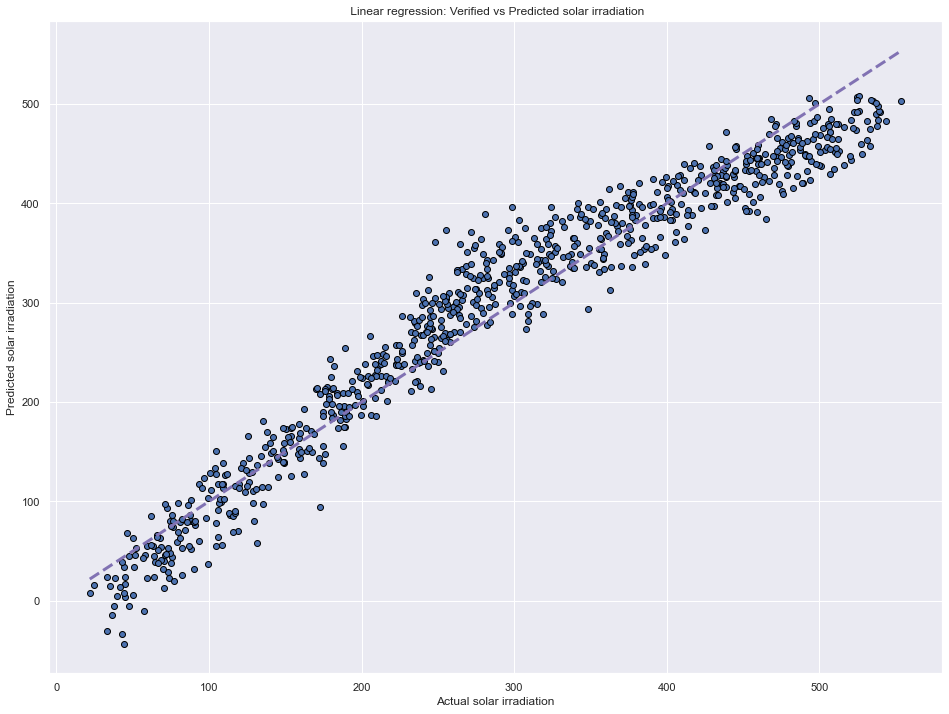

In [20]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_lr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Linear regression: Verified vs Predicted solar irradiation")
plt.show() 

#### Jointplot

C:\Users\sulma\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


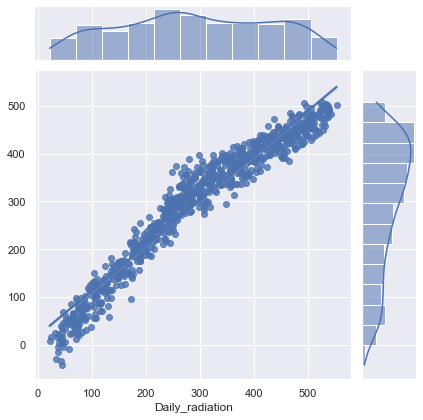

In [21]:
# Jointplot
sns.jointplot(y_test, y_pred_lr, kind = 'reg')
plt.show()

### Random Forest Regressor

#### Make predictions using Random Forest Regression

In [22]:
# Setup the pipeline steps for random forest: steps
steps = [('scaler', StandardScaler()), ('rfr', RandomForestRegressor())]
# Create the pipeline: pipeline
pipeline_rfr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_rfr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_rfr = pipeline_rfr.predict(X_test)

#### Evaluate algorithm performance

In [23]:
# Evaluating algorithm performance
mse_rf = mean_squared_error(y_test, y_pred_rfr, squared = False)

mae_rf = mean_absolute_error(y_test, y_pred_rfr)

print('r2_score: ', r2_score(y_test, y_pred_rfr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_rf))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_rf))

r2_score:  0.9922859732411744
Root Mean Squared Error: 3.50
Root Mean Absolute Error: 2.84


#### Scatterplot of test data with regression line

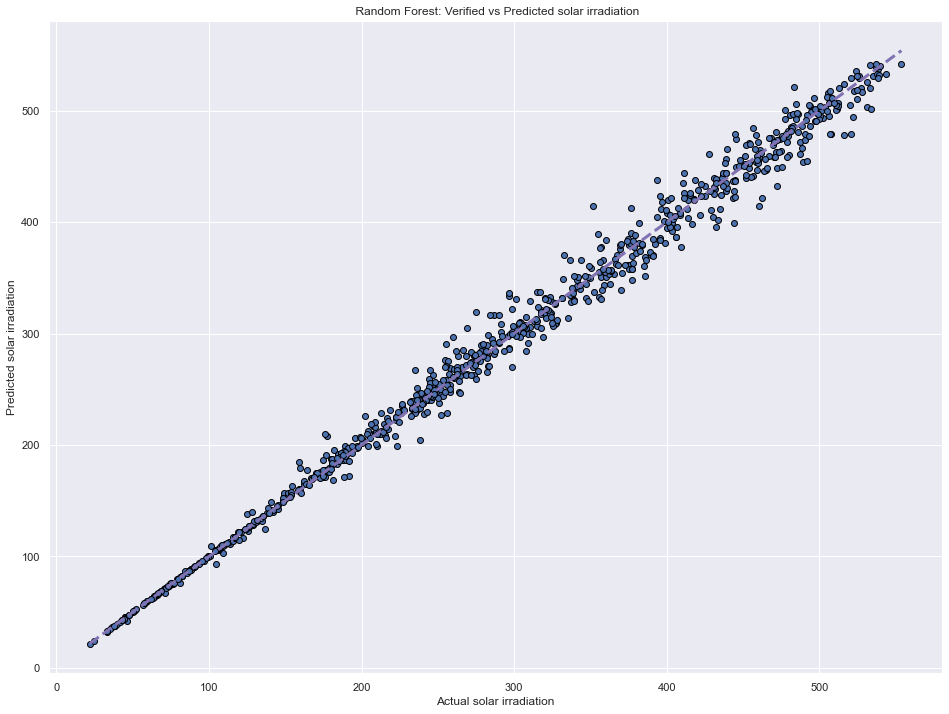

In [24]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_rfr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Random Forest: Verified vs Predicted solar irradiation")
plt.show()

#### Jointplot

C:\Users\sulma\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


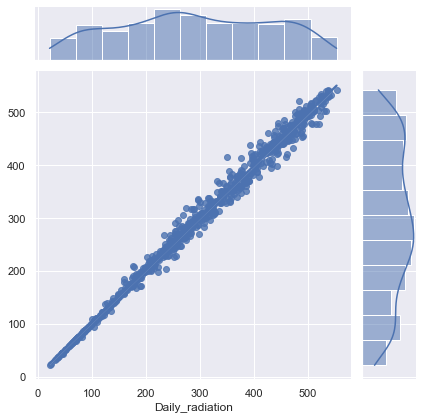

In [25]:
# Jointplot
sns.jointplot(y_test, y_pred_rfr, kind = 'reg')
plt.show()

### GradientBoosting Regressor

#### Make predictions using gradient boosting regression

In [26]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('gbr', GradientBoostingRegressor())]
# Create the pipeline: pipeline
pipeline_gbr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_gbr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_gbr = pipeline_gbr.predict(X_test)

#### Evaluate algorithm performance

In [27]:
# Evaluating algorithm performance
mse_gr = mean_squared_error(y_test, y_pred_gbr, squared = False)

mae_gr = mean_absolute_error(y_test, y_pred_gbr)

print('r2_score: ', r2_score(y_test, y_pred_gbr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_gr))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_gr))

r2_score:  0.9894547350740637
Root Mean Squared Error: 3.78
Root Mean Absolute Error: 3.22


#### Scatterplot of test data with regression line

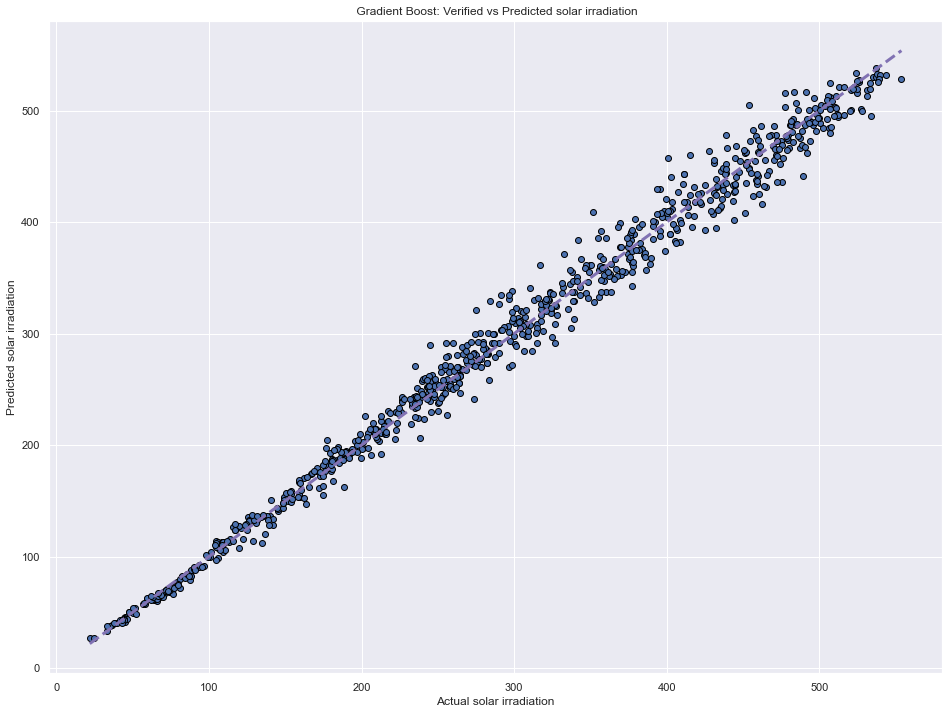

In [28]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_gbr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Gradient Boost: Verified vs Predicted solar irradiation")
plt.show()

#### Jointplot

C:\Users\sulma\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


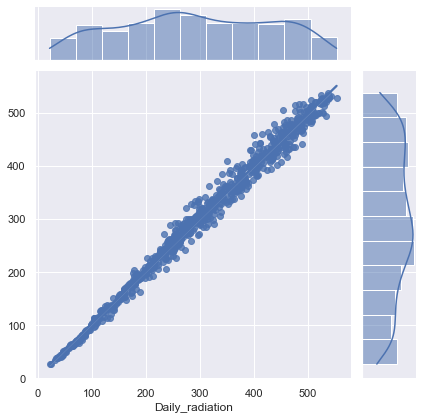

In [29]:
# Jointplot
sns.jointplot(y_test, y_pred_gbr, kind = 'reg')
plt.show()

### Model Validation

#### Read in validation set

In [31]:
# Validation data
val_df = pd.read_csv('../datasets/cleaned/validation.csv')
X_val = val_df.drop(['Daily_radiation'], axis=1)
y_val = val_df['Daily_radiation']

#### Apply previously used algorithms on validation set

In [32]:
# Validate models
y_val_lr = pipeline_lr.predict(X_val)
y_val_rfr = pipeline_rfr.predict(X_val)
y_val_gbr = pipeline_gbr.predict(X_val)

#### Evaluate linear regression performance

In [34]:
# Evaluating algorithm performance for linear regression
mse_lr_val = mean_squared_error(y_val, y_val_lr, squared = False)

mae_lr_val = mean_absolute_error(y_val, y_val_lr)

print('r2_score: ', r2_score(y_val, y_val_lr))

print('Linear Regression - Root Mean Squared Error: %.2f' % np.sqrt(mse_lr_val))

print('Linear Regression - Root Mean Absolute Error: %.2f' % np.sqrt(mse_lr_val))

r2_score:  0.9450409711493557
Linear Regression - Root Mean Squared Error: 5.80
Linear Regression - Root Mean Absolute Error: 5.80


#### Evaluate random forest regression performance

In [35]:
# Evaluating algorithm performance for random forest regression
mse_rf_val = mean_squared_error(y_val, y_val_rfr, squared = False)

mae_rf_val = mean_absolute_error(y_val, y_val_rfr)

print('r2_score: ', r2_score(y_val, y_val_rfr))

print('Random Forest - Root Mean Squared Error: %.2f' % np.sqrt(mse_rf_val))

print('Random Forest - Root Mean Absolute Error: %.2f' % np.sqrt(mse_rf_val))

r2_score:  0.9938124052154723
Random Forest - Root Mean Squared Error: 3.36
Random Forest - Root Mean Absolute Error: 3.36


#### Evaluate gradient boosting regression performance

In [36]:
# Evaluating algorithm performance for gradient boost regression
mse_gbr_val = mean_squared_error(y_val, y_val_gbr, squared = False)

mae_gbr_val = mean_absolute_error(y_val, y_val_gbr)

print('r2_score: ', r2_score(y_val, y_val_gbr))

print('Gradient Boost - Root Mean Squared Error: %.2f' % np.sqrt(mse_gbr_val))

print('Gradient Boost - Root Mean Absolute Error: %.2f' % np.sqrt(mae_gbr_val))

r2_score:  0.9908421343548167
Gradient Boost - Root Mean Squared Error: 3.70
Gradient Boost - Root Mean Absolute Error: 3.10
